In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
house=pd.read_csv('/content/Yash Markad - Housing.csv')
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
min_price = house["price"].min()
max_price = house["price"].max()
print(f"The price range is from {min_price} to {max_price}")

The price range is from 1750000 to 13300000


In [26]:
house['price'] = house['price'].astype('int')
temp = house.copy()
# table = temp.groupby(['CompanyName'])['price'].mean()
# temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,1750000,10000000,13300000]
house_bin=['Budget','Medium','Highend']
house['houserange'] = pd.cut(house['price'], bins, right=False, labels=house_bin)
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,houserange
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,Highend
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,Highend
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,Highend
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,Highend


In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    object  
 6   guestroom         545 non-null    object  
 7   basement          545 non-null    object  
 8   hotwaterheating   545 non-null    object  
 9   airconditioning   545 non-null    object  
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    object  
 12  furnishingstatus  545 non-null    object  
 13  houserange        544 non-null    category
dtypes: category(1), int64(6), object(7)
memory usage: 56.1+ KB


In [28]:
house['houserange'] = house['houserange'].fillna('Highend')

In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  houserange        545 non-null    object
dtypes: int64(6), object(8)
memory usage: 59.7+ KB


In [12]:
cat=house.select_dtypes(object)
cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus', 'houserange'],
      dtype='object')

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    object  
 6   guestroom         545 non-null    object  
 7   basement          545 non-null    object  
 8   hotwaterheating   545 non-null    object  
 9   airconditioning   545 non-null    object  
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    object  
 12  furnishingstatus  545 non-null    object  
 13  houserange        545 non-null    category
dtypes: category(1), int64(6), object(7)
memory usage: 56.1+ KB


In [10]:
house['houserange']=house['houserange'].astype('object')

In [13]:
import pandas as pd

# Assuming 'house' is your DataFrame

for column in cat.columns:
    unique_values = cat[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'mainroad': ['yes' 'no']
Unique values in column 'guestroom': ['no' 'yes']
Unique values in column 'basement': ['no' 'yes']
Unique values in column 'hotwaterheating': ['no' 'yes']
Unique values in column 'airconditioning': ['yes' 'no']
Unique values in column 'prefarea': ['yes' 'no']
Unique values in column 'furnishingstatus': ['furnished' 'semi-furnished' 'unfurnished']
Unique values in column 'houserange': ['Highend' 'Medium']


In [14]:
def dummies (x,df):
    temp=pd.get_dummies(df[x],drop_first=True).astype(np.uint8)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df
house_lr = house
house_lr = dummies('mainroad',house_lr)
house_lr = dummies('guestroom',house_lr)
house_lr = dummies('basement',house_lr)
house_lr = dummies('hotwaterheating',house_lr)
house_lr = dummies('airconditioning',house_lr)
house_lr = dummies('prefarea',house_lr)
house_lr=dummies('furnishingstatus',house_lr)
house_lr=dummies('houserange',house_lr)

In [ ]:
house_lr = pd.get_dummies(house_lr, columns=['houserange'], drop_first=True, dtype=np.uint8)

In [15]:
house_lr

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,yes,semi-furnished,unfurnished,Medium
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,1
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,1


In [16]:
house_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           545 non-null    int64
 1   area            545 non-null    int64
 2   bedrooms        545 non-null    int64
 3   bathrooms       545 non-null    int64
 4   stories         545 non-null    int64
 5   parking         545 non-null    int64
 6   yes             545 non-null    uint8
 7   yes             545 non-null    uint8
 8   yes             545 non-null    uint8
 9   yes             545 non-null    uint8
 10  yes             545 non-null    uint8
 11  yes             545 non-null    uint8
 12  semi-furnished  545 non-null    uint8
 13  unfurnished     545 non-null    uint8
 14  Medium          545 non-null    uint8
dtypes: int64(6), uint8(9)
memory usage: 30.5 KB


In [30]:
num=house.select_dtypes(np.number)
num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [32]:
cor=num.corr()
cor

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [19]:
cor=num.corr()
cor

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

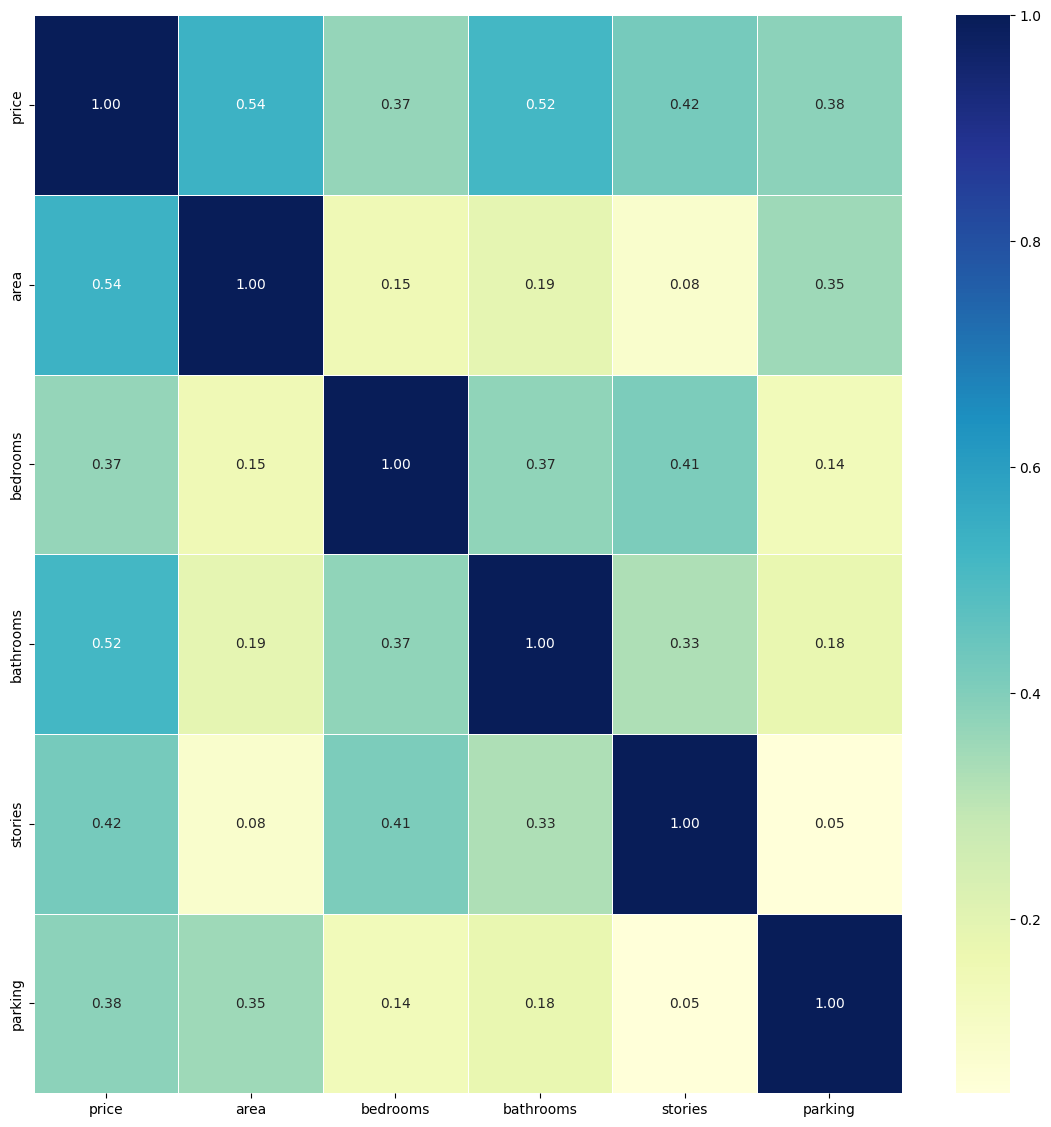

In [33]:
plt.figure(figsize=(14,14))
sns.heatmap(cor, annot=True, linewidths=.5, fmt=".2f", cmap="YlGnBu")

In [35]:
house.shape

(545, 14)

In [34]:
house_lr.shape

(545, 15)

In [36]:
y=house_lr['price']
x=house_lr.drop(['price'],axis=1)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [42]:
X_train_with_const = add_constant(X_train)

In [43]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const, i) for i in range(X_train_with_const.shape[1])]

print(vif_data)

           feature         VIF
0            const  154.924346
1             area    1.334367
2         bedrooms    1.383331
3        bathrooms    1.378461
4          stories    1.521073
5          parking    1.218269
6              yes    1.185399
7              yes    1.269602
8              yes    1.384908
9              yes    1.040121
10             yes    1.267670
11             yes    1.143824
12  semi-furnished    1.594116
13     unfurnished    1.697231
14          Medium    1.152745


In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
import statsmodels.api as sm
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const).fit()

In [45]:
print(model.summary())  # Print the model summary including p-values

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     78.71
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          5.51e-108
Time:                        16:08:02   Log-Likelihood:                -6607.4
No. Observations:                 436   AIC:                         1.324e+04
Df Residuals:                     421   BIC:                         1.331e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.025e+06    5.6e+05      7.

In [48]:
import statsmodels.api as sm

# ... (your existing code) ...

# Add a constant column to X_test before prediction
X_test_with_const = sm.add_constant(X_test)

# Now predict using X_test_with_const
y_pred = model.predict(X_test_with_const)

# ... (rest of your code) ...
from sklearn.metrics import r2_score
print("Test Prediction R-Sqrd: ", r2_score(y_test, y_pred))

Test Prediction R-Sqrd:  0.7249970940221526


remove features

In [51]:
X_train=X_train.drop(['bedrooms','semi-furnished'],axis=1)
X_test=X_test.drop(['bedrooms','semi-furnished'],axis=1)

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


Ridge(alpha=1)

In [59]:
r2=ridege.score(X_train,y_train)
r2

0.721492655963478

In [56]:
r2=ridege.score(X_test,y_test)
r2

0.7183744851318202

In [ ]:
#our model gives train accurcy as 72% and test accuracy is 71%

In [60]:
model3=Ridge(alpha=2)
model3.fit(X_train,y_train)

Ridge(alpha=2)

In [61]:
model3.score(X_train,y_train)

0.7189598921713503

In [62]:
model3.score(X_test,y_test)

0.7123335402391247

In [81]:
model4=Ridge(alpha=0.05)
model4.fit(X_train,y_train)

Ridge(alpha=0.05)

In [82]:
model4.score(X_train,y_train)

0.7228539928417655

In [83]:
model4.score(X_test,y_test)

0.7235372926458241

In [84]:
from sklearn.metrics import r2_score
alphas = np.logspace(-3, 3, 13)  # Alpha values to test (adjust as needed)
train_scores = []
test_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)  # Create Ridge model
    model.fit(X_train, y_train)  # Train the model

    train_score = model.score(X_train, y_train) #Training Accuracy
    test_score = model.score(X_test, y_test)   #Testing Accuracy

    train_scores.append(train_score)
    test_scores.append(test_score)

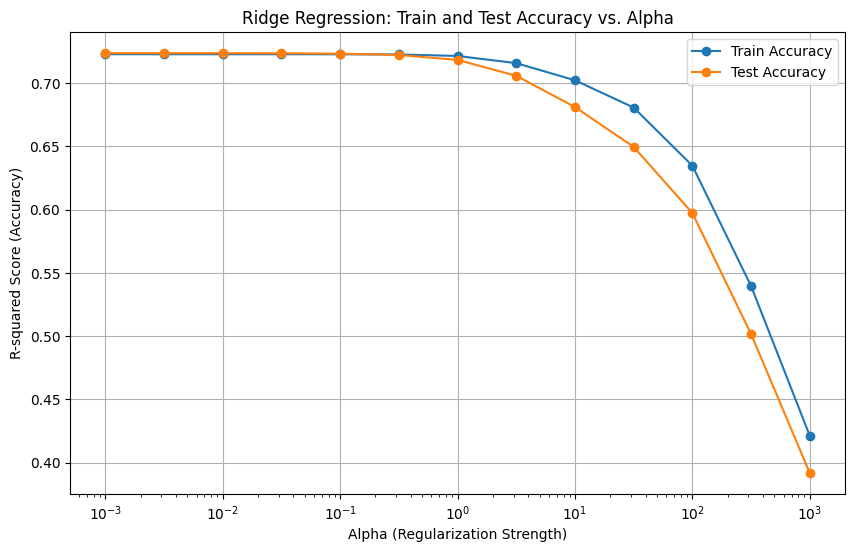

In [85]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(alphas, train_scores, label='Train Accuracy', marker='o')
plt.plot(alphas, test_scores, label='Test Accuracy', marker='o')
plt.xscale('log')  # Use log scale for x-axis if using a wide range of alphas
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R-squared Score (Accuracy)')
plt.title('Ridge Regression: Train and Test Accuracy vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()